### Assignment 3

Due Wed night Feb 5 (before 2:00 AM Thu Feb 6)

## ODEs : N-bodies under gravity

#### Equations

An object at position $\mathbf r_0$ will experience a vector acceleration $\mathbf a$ due to another body with mass $m_1$ at $\mathbf r_1$

$$
\mathbf a = \frac{G m_1}{|\mathbf r_1- \mathbf r_0|^3}(\mathbf r_1 - \mathbf r_0)
$$
where 

If there are multiple bodies, we add the accelerations vectorially:
$$
\mathbf a  = \sum_{i=1}^N \frac{G m_i}{|\mathbf r_i- \mathbf r_0|^3}(\mathbf r_i- \mathbf r_0)
$$

As we have seen in class, there are several different methods to integrate the equations of motion. 

#### a) 

Your code below should implement the Euler, RK2 and RK4 methods for an arbitrary number of bodies, given an initial position and velocity and a mass for each body.

_Try to write the code in a general way so that only the minimum changes need to be made to run using a different method or a different time step._

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = 6.673e-11

def dfdt(f0,t, M = [5.972e24,0.1] , N = 2):
    """
    Calculates the derivatives of the given phase space at an instant of time
    for an N body system under gravity
    
    Args:
        f0: given phase space (numpy array or a list)
        t: instant of time (integer or a float)
        M: Mass of All the bodies in Phase space (numpy array or list)
                                                 (default [Mass of Earth, Mass of a projectile])
        N: number or bodies in the system (default 2)
    
    Requirements:
        size of f0 = N * 6
        size of M = N

    Returns:
        dfdt derivative of all the coordinates in the phase space
    
    
    """
    #converts the phase space to a 2d array of shape (N,6)
    converted_f0 = np.reshape(f0,(N,6))
    
    #initialize all the arrays used in the function
    dfdt = np.array(converted_f0) #derivatives of phase space
    f = np.array(converted_f0) #converted phase space
    m_xi_x0 = np.array(f[0:N,0:N]) #array which stores xi - xj
    m_yi_y0 = np.array(f[0:N,0:N]) #array which store yi - yj
    m_zi_z0 = np.array(f[0:N,0:N]) #array which stores zi - zj
    sum_total = np.array(f[0:N,0:N]) #array which sums all the coordinate arrays
    
    k = 0 #counter used 
    
    #all unit vector's data updated
    for i in range(0,N):
        for j in range(0, N):
                m_xi_x0[i][j] = (-f[j][0] + f[k][0]) #unit vector in x
                m_yi_y0[i][j] = (-f[j][1] + f[k][1]) #unit vector in y
                m_zi_z0[i][j] = (-f[j][2] + f[k][2]) #unit vector in z
        k += 1

    sum_total = (((m_xi_x0)**2) + ((m_yi_y0)**2) + ((m_zi_z0)**2))**1.5 #size of the vector
    
    #all unit vector's are changed to respective acceletrations
    for i in range(0,N):
        for j in range(0, N):
            if(i != j): #as diagonal elements are zero
                m_xi_x0[i][j] = (m_xi_x0[i][j]/ sum_total[i][j])*M[i]*G #accelaration in x
                m_yi_y0[i][j] = (m_yi_y0[i][j]/ sum_total[i][j])*M[i]*G #accelaration in y
                m_zi_z0[i][j] = (m_zi_z0[i][j]/ sum_total[i][j])*M[i]*G #accelaration in z
                
    #adds the columns of each of m_xi_x0, m_yi_y0, m_zi_z0
    final_cell = np.array([(np.sum(m_xi_x0, axis = 0)),(np.sum(m_yi_y0, axis = 0)),(np.sum(m_zi_z0, axis = 0))])            

    #stores the derivatives in 
    for i in range(0,N):
        for j in range(3,6):
            dfdt[i][j-3] = f[i][j]
            dfdt[i][j] = final_cell[j-3][i]
    
    
    return dfdt.flatten()              



def euler(f, p0, M, t, N = 2, *args):
    """
    implements Euler's method to solve a differential equation to
    get the movement of the the n bodies through space
    
    Args:
        f: function that return the derivatives of the phase space
        p0: given phase space (numpy array or a list)
        t: time for which the method has to be run)
        M: Mass of All the bodies in Phase space (numpy array or list)
        N: number or bodies in the system (default 2)
    
    Requirements:
        size of p0 = N * 6
        size of M = N

    Returns:
        x an array of phase space coordinates at every time step

    """
    #initializes all the arrays and variables
    p = np.array(p0)
    t0 = t[0]
    time_length = len(t)
    
    #intial derivatives are fetched
    dpdt = f(p, t, M ,N, *args)

    x = np.empty((time_length, len(p)))
    #intial value of derivatives is stored
    x[0,:] = p

    for i in range(1, time_length):

        dt = t[i] - t0 #time step is calculated
        t0 = t[i] #intial value of time is updated 
        
        p += dpdt * dt #coordinates of the bodies are found at that instant of time
        x[i, :] = p #value of the new cordinates updates

        dpdt = f(p, t, M ,N, *args) #derivatives updated using the new values

        

    return x

def RK2(f, p0, M, t, N=2, *args):
    """
    implements Rk2 method to solve a differential equation to
    get the movement of the the n bodies through space
    
    Args:
        f: function that return the derivatives of the phase space
        p0: given phase space (numpy array or a list)
        t: time for which the method has to be run)
        M: Mass of All the bodies in Phase space (numpy array or list)
        N: number or bodies in the system (default 2)
    
    Requirements:
        size of p0 = N * 6
        size of M = N

    Returns:
        x an array of phase space coordinates at every time step

    """
    #vectors intitalized
    time_length = len(t)
    x = np.array([p0]* time_length)
    
    for i in range(time_length - 1):
        h = t[i+1] - t[i] #time step calculated
        
        #calculates the coordinates for half step
        inter_step = h * f(x[i], t, M ,N, *args) / 2.0 
        
        #using the half step full step value is calculated
        x[i+1] = x[i] + h * f( x[i] + inter_step, t[i] + h / 2.0, M , *args ) 

    return x


def RK4(f, p0, M, t,N=2, *args):
    """
    implements Rk4 method to solve a differential equation to
    get the movement of the the n bodies through space
    
    Args:
        f: function that return the derivatives of the phase space
        p0: given phase space (numpy array or a list)
        t: time for which the method has to be run)
        M: Mass of All the bodies in Phase space (numpy array or list)
        N: number or bodies in the system (default 2)
    
    Requirements:
        size of p0 = N * 6
        size of M = N

    Returns:
        x an array of phase space coordinates at every time step

    """
    #initialise all the vectors
    time_length = len(t)
    x = np.array([p0]* time_length)
    
    for i in range(time_length - 1):
        h = t[i+1] - t[i]
        
        #the four RK4 steps are calculated
        k1 = h * f(x[i], t[i],M,N, *args)
        k2 = h * f(x[i] + k1*0.5 ,t[i],M,N, *args)
        k3 = h * f(x[i] + k2*0.5 ,t[i],M,N, *args)
        k4 = h * f(x[i] + k3 ,t[i],M,N, *args)
        
        #using the four steps the coordinates for next step are evaluated
        x[i+1] = x[i] + (k1 + k2 + k2 + k3 + k3 + k4) / 6
        
    return x


 

#### b) Test 1

It's always a good idea to check your code with a simple test. For example, it should reproduce known projectile motion solutions.

In this test case, there are only 2 bodies: the Earth and the projectile. The Earth's mass is 5.972e24 kg and the radius of the Earth is 6.371e6 m (assume spherical). 

Assuming centre of the Earth is at coordinates (0,0,0), launch a projectile with mass 0.1 kg from the _surface_ of the Earth with a velocity 10 m/s straight up. Assume no air resistance.

According to your analytic calculation (and assuming constant $g$) in the Markdown/Latex cell below, how long will it take to return to the surface? What is the maximum height above the surface that the projectile reaches?

###### ANSWER
$$
\begin{eqnarray}
v - u &=& -gt_{top}
\end{eqnarray}
$$
Also at highest point the object has zero velocity

$$
\begin{eqnarray}
\\
\Longrightarrow v = 0 
\Longrightarrow -u = -gt_{top}
\Longrightarrow t_{top} = \frac{u}{g}
\Longrightarrow t_{top} = \frac{10 m/s}{9.81 m/s^2}
\Longrightarrow t_{top} = \frac{10}{9.81}s
\Longrightarrow t_{top} = 1.01936799185s
\end{eqnarray}
$$

Hence the time required to reach the maximum height is the same as it takes to reach back due to symmetry

$$
\begin{eqnarray}
\\
\Longrightarrow t_{total} = 2*t_{top}
\Longrightarrow t_{total} = 2*1.01936799185s
\Longrightarrow t_{total} = 2.03873598369s
\end{eqnarray}
$$

For Max Height
$$
\begin{eqnarray}
v^2 - u^2= -2gH_{max}
\end{eqnarray}
$$

$$
\begin{eqnarray}
\Longrightarrow v^2 = 0
\Longrightarrow u^2 = 2gH_{max}
\Longrightarrow H_{max} = \frac{u^2}{2g}
\Longrightarrow H_{max} = \frac{( 10m/s )^{2}}{2*9.81 m/s^2}
\Longrightarrow H_{max} = \frac{50}{9.81}m
\Longrightarrow H_{max} = 5.0968799185m
\end{eqnarray}
$$

#### c)

Now run your code for the amount of time that you calculated above plus a small bit extra (and with timesteps of 0.01s)

Make a plot of the projectile's height above surface of the Earth as a function of time. 

Note 1: you should not use show() since we have included `%matplotlib inline` above. 

Note 2: In the next part you will be launching more projectiles from the surface of the Earth, so you are advised to a define function to simplify repeated calls, allowing for different initial velocities, timesteps and methods. For example:

``def earth_projectile(vinit, times, method='euler'):``

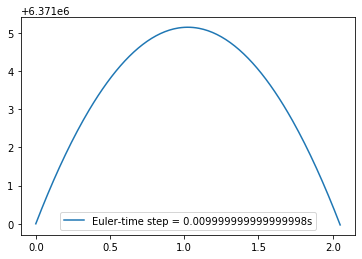

In [3]:
def earth_projectile(vinit, times, method='Euler', M = 0.1, Graph = False):
    """
    Simulates a projectile thrown from the surface of the earth
    using different differential equation solving methods
    
    Args:
        vinit: inital velocity of the projectile
        times: time through which the projectile has to be run
        method:  method to be used to solve the differential equation (default: 'Euler')
        M: Mass of the projectile (default: 0.1kg)
        Graph: Prints Graph if True (default False)
    
    Requirements:
        vinit > 0
        M > 0
        method to be either Euler, RK2 or RK4
    
    Returns:
        x co-ordinates of the projectile at every time step

    """
    #intializes p0 with earth at origin and projectile at surface
    p0 = np.array([0.,0.,0.,0.,0.,0.,0.,6.371e6,0.,0.,float(vinit),0.]) 
    #intializes the Mass list
    Mass = [5.972e24,M]
    #implements different method based on the input
    if(method == 'Euler'):
        output = euler(dfdt, p0, Mass, times) 
    elif(method == 'RK2'):
        output = RK2(dfdt, p0, Mass, times)
    elif(method == 'RK4'):
        output = RK4(dfdt, p0, Mass, times)
    else:
        print("invalid method")
        output = None
    #prints graph if asked for
    if(Graph):
        if(output.all() != None):
            #takes time in x coordinate
            x = times[:]
            #takes the y component
            y = output[:,7]
            #plots the graph with time step
            plt.plot(x,y,label=(method + "-time step = " + str(times[1]-times[0])+"s")); 
            plt.legend();
    return output

output = earth_projectile(10, np.linspace(0,2.05,206), method='Euler', M =0.1, Graph = True)
    

#### d) Test 2 : Escape!

Now let's throw the projectile a little bit harder: try 12000 m/s straight up.

Run your Euler code from 0 to 30000 seconds inclusive in steps of 100 seconds (``np.linspace(0,30_000,301)``) and 500 seconds. Plot projectile height against time for both cases on the same plot.

Repeat with RK2 and RK4, for timesteps of 500 seconds. Add them all to the same plot.

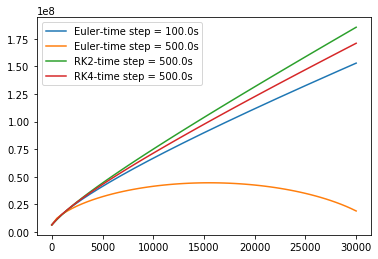

In [4]:
output1 = earth_projectile(12000, np.linspace(0,30_000,301), method='Euler', M = 0.1, Graph = True)
output2 = earth_projectile(12000, np.linspace(0,30_000,61), method='Euler', M = 0.1, Graph = True)
output3 = earth_projectile(12000, np.linspace(0,30_000,61), method='RK2', M = 0.1, Graph = True)
output4 = earth_projectile(12000, np.linspace(0,30_000,61), method='RK4', M = 0.1, Graph = True)


#### e) 
In the cell below, explain why the long-timestep (500s) Euler solution has _qualitatively_ a very different behaviour compared with the higher precision (short-timestep) Euler solution.

###### ANSWER

As the error on Euler's method is of the order O(h) where h is the time step hence on a 500second time step the accuracy is very low. Hence the error on the 500 second time step accumulates and the projectile falls back to the earth

Hence as Euler assumes the velocity to be constant for a longer duration it over estimates the slope and the error accumaltes with each step and hence the object returns back to earth.

### f) 
Taking ``odeint`` at $t=30 000$ s as "truth" calculate the fractional error for RK4 with timesteps of 500 s.  

Manually adjust via triak and error the Euler timestep so that it has approximately the same fractional error as RK4.

In [5]:
p0 = np.array([0.,0.,0.,0.,0.,0.,0.,6.371e6,0.,0.,12000.,0.])
t = np.linspace(0,30_000,61)
M = [5.972e24,0.1]
sol = scipy.integrate.odeint(dfdt, p0, t, args=(M,))

error_rk4 = output4[:,7]/sol[:,7]

output5 = earth_projectile(12000, np.linspace(0,30_000,2401), method='Euler', M = 0.1)
sol2 = scipy.integrate.odeint(dfdt, p0, np.linspace(0,30_000,2401), args=(M,))

error_euler = output5[:,7]/sol2[:,7]

checker = [1]

#as Euler would have far more steps than rk4 to compare the error on both
#we compare the value of the same time steps. i.e 100 second times step

for i in range(1,61):
    if(abs(error_rk4[i]-error_euler[i*40]) <= 0.01):
        checker.append(1)
    else:
        checker.append(0)    


if(all(i == 1 for i in checker)):
    print("The given Euler has the same fractional error as RK4")
else:
    print("The given Euler doesnt the same fractional error as RK4")

The given Euler has the same fractional error as RK4


Now having fixed the timesteps for both methods to achieve the same accuracy, time the Euler method using the ``%%timeit`` cell magic command https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit

In [6]:
%%timeit 
earth_projectile(12000, np.linspace(0,30_000,2401), method='Euler', M = 0.1)

238 ms ± 665 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


And time RK4.

In [7]:
%%timeit
earth_projectile(12000, np.linspace(0,30_000,61), method='RK4', M = 0.1)

24.3 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


At the _same accuracy_ , RK4 should be faster. By what factor? Explain why?

###### ANSWER

Rk4 is faster by approximately a factor of 10

Because for the same accuracy Euler need 40 times the time steps of RK4

#### g) Test 3

In the example above the projectile might have been a small object, such as an apple.

As you all know, Newton realized that apples and the moon were governed by the same force: gravity.

So now let's replace the apple with the moon. The moon has a mass of 7.348e22  kg. The distance between the centre of the Earth and the centre of the Moon is 384,403 km. Finally let's approximate the Moon's orbit as circular with an orbital speed of 1.022 km/s.

Now you may think that you just need to give the moon a tangential velocity and you are done. But if you do _only_ that the Earth-moon system has a net non-zero momentum and it will wander off in one direction. To keep the centre of mass of the Earth-moon system at rest, the Earth needs equal and opposite momentum to the moon!

Plot the orbit of the moon.

To force the plot to have equal units in horizontally and vertically (so that circular orbits appear circular) use `plt.gca().set_aspect(aspect='equal')`

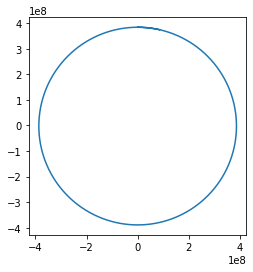

In [8]:
def net_momentum_finder(v2 = 1022., M1 = 5.972e24, M2 = 7.348e22):
    """
    finds the unknown velocity in a 2 body system using conservation of momentum
    
    Args:
        v2: inital velocity the second body (default = 1022.)
        M1: Mass of the first body (default: 5.972e24kg)
        M2: Mass of the second body (default: 7.348e22kg)
    
    Requirements:
        M1 > 0
        M2 > 0
    
    Returns:
        (M2*v2)/M1 velocity of the first objectq

    """
    return -(M2*v2)/M1


def earth_planet(vinit, times,radius, method='Euler', M = 7.348e22, Graph = False, Graph_other = True):
    """
    simulates the motion of a celestial body due to earths gravitational field aroudn the earth
    
    Args:
        vinit: intial tangential velocity of the celestial body
        times: array of time
        radius: distance between the centre of the Earth and the centre of the body 
        method: method used to solver the differential equation (default = 'Euler')
        M: Mass of the celestial body (default = 7.348e22kg)
        Graph: Plots the Graph if True (default = False)
        Graph_other: Plots the Graph of the celestial body if True (Default = True)
    
    Requirements:
        M > 0
        R > 0
        methods to be either of euler, RK2, RK4
    
    Returns:
        output the phase space vector

    """
    #intializes the velocity of earth to ensure conservation of momentum
    v1 = net_momentum_finder(vinit, M2 = M)
    #intializes the phase space list with intial coordinates
    p0 = [0.,0.,0.,float(v1),0.,0.,0.,float(radius),0.,float(vinit),0.,0.]
    #intializes Mass
    Mass = [5.972e24,7.348e22]
    #checks which method is told to implement
    if(method == 'Euler'):
        output = euler(dfdt, p0, Mass, times) 
    elif(method == 'RK2'):
        output = RK2(dfdt, p0, Mass, times)
    elif(method == 'RK4'):
        output = RK4(dfdt, p0, Mass, times)
    else:
        print("invalid method")
        output = None
    #plots graph and checks if asked to graph
    if(Graph):
        #checks which object's graph has to be plot
        if(Graph_other):
            if(output.all() != None):
                x = output[:,6]
                y = output[:,7]
                plt.plot(x,y); 
                plt.gca().set_aspect(aspect='equal');
        else:
            if(output.all() != None):
                x = output[:,0]
                y = output[:,1]
                plt.plot(x,y); 
                plt.gca().set_aspect(aspect='equal');
                
    return output

earth_moon = earth_planet(1022, np.linspace(0,2.506e+6,1000),3.84e8, method='RK4', M = 7.348e22, Graph = True)


Now plot the orbit of the Earth. What is the radius of the Earth's orbit around the centre of mass?

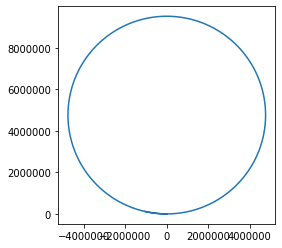

In [9]:
earth = earth_planet(1022, np.linspace(0,2.506e+6,1000),3.84e8, method='RK4', M = 7.348e22, Graph = True,Graph_other = False )


###### ANSWER

radius of earth's orbit= 4756927.13193121 meters

obtained by finding the max value at output[0:,1] and dividing it by 2


#### h) Test 4 : Three body problem

Imagine a trinary star system of three equal-mass stars, all with mass the same as the sun.

Suppose they are in orbit around their common centre of mass.

Let us put them in the $x-y$ plane. The initial positions are

* Star 1 is at (-0.5, -0.28867) AU
* Star 2 is at (0., 0.57735) AU
* Star 3 is at (+0.5, -0.28867) AU

where an AU (Astronomical Unit) is 1.49597871e11

The initial velocities are

* Star 1: (14894.68, -25798.34) m/s
* Star 2: (-29789.36, 0) m/s
* Star 3: (14894.68, +25798.34) m/s

Set up the system and run it for 2e7 seconds with steps of 10000 s. 

Plot the positions of each star on the same plot (using different colours), but using a symbol like ``x`` or ``+`` every 100 steps (1e6 seconds). Describe the motions.

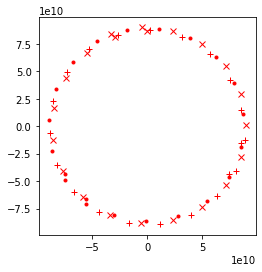

In [10]:
#intialize all coordinates for 1st body
x1 = -0.5*1.49597871e11
y1 = -0.28867*1.49597871e11
v1_x = 14894.68
v1_y = -25798.34

#intialize all coordinates for 2nd body
x2 = 0.
y2 = 0.57735*1.49597871e11
v2_x = -29789.36
v2_y = 0

#intialize all coordinates for 3rd body
x3 = 0.5*1.49597871e11
y3 = -0.28867*1.49597871e11
v3_x = 14894.68
v3_y = 25798.34

#intialize all Masses
Mass_3b = [1.989e30,1.989e30,1.989e30]
#intialize all coordinates
p0 = [x1,y1,0.,v1_x,v1_y,0.,x2,y2,0.,v2_x,v2_y,0,x3,y3,0.,v3_x,v3_y,0]
#intialize time
time_3b_ = np.linspace(0,2e7,2001)

#simulates a 3 body system under gravity
output_3b = euler(dfdt, p0, Mass_3b, time_3b_, N = 3)

#plots the graph for the three bodies
p1_x = output_3b[:,0]
p1_y = output_3b[:,1]
p2_x = output_3b[:,6]
p2_y = output_3b[:,7]
p3_x = output_3b[:,12]
p3_y = output_3b[:,13]
plt.plot(p1_x,p1_y, 'r.', markevery = 100);
plt.plot(p2_x,p2_y, 'rx', markevery = 100);
plt.plot(p3_x,p3_y, 'r+', markevery = 100);
plt.gca().set_aspect(aspect='equal');

###### ANSWER

All Objects are in circular motion around the origin of the system

Now run and plot for another 8e7 seconds (letting the initial conditions here be the final timestep of the previous run).

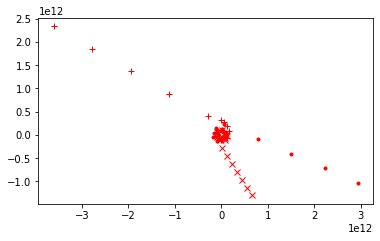

In [11]:
#sets the intial vector to be the final value of the previous simulation
p0_now = output_3b[-1]
#intializes all other values
Mass_3b = [1.989e30,1.989e30,1.989e30]
time_3b_now = np.linspace(0,8e7,2001)

#simulates the 3 body system 
output_3b_now = euler(dfdt, p0_now, Mass_3b, time_3b_now, N = 3)
#plots the Graph
p1_x_n = output_3b_now[:,0]
p1_y_n = output_3b_now[:,1]
p2_x_n = output_3b_now[:,6]
p2_y_n = output_3b_now[:,7]
p3_x_n = output_3b_now[:,12]
p3_y_n = output_3b_now[:,13]
plt.plot(p1_x_n,p1_y_n, 'r.', markevery = 100);
plt.plot(p2_x_n,p2_y_n, 'rx', markevery = 100);
plt.plot(p3_x_n,p3_y_n , 'r+', markevery = 100);
plt.gca().set_aspect(aspect='equal');

Describe what has happened and why.

##### Answer

The bodies rotate around the origin untill they gain enough speed to escape the system and each of the object escapes the other's gravitation field and drifts away to inifinity

Now combine and repeat the above two steps (1.e8 integration) with RK4.

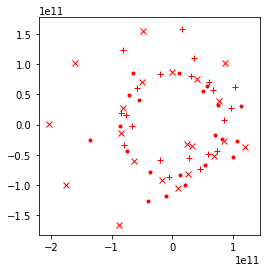

In [12]:
#intializes the vectors to be used
p0 = [x1,y1,0.,v1_x,v1_y,0,x2,y2,0.,v2_x,v2_y,0,x3,y3,0.,v3_x,v3_y,0]
time_3b_RK4 = np.linspace(0,1e8,2001)

#simulates the 3 bodies using RK4
output_3b_RK4 = RK4(dfdt, p0, Mass_3b, time_3b_RK4, N = 3)

#plots the graph
p1_x = output_3b_RK4[:,0]
p1_y = output_3b_RK4[:,1]
p2_x = output_3b_RK4[:,6]
p2_y = output_3b_RK4[:,7]
p3_x = output_3b_RK4[:,12]
p3_y = output_3b_RK4[:,13]
plt.plot(p1_x,p1_y, 'r.', markevery = 100);
plt.plot(p2_x,p2_y, 'rx', markevery = 100);
plt.plot(p3_x,p3_y, 'r+', markevery = 100);
plt.gca().set_aspect(aspect='equal');

There may be differences in detail but qualitatively is the result the same as for Euler? Why or why not?

##### Answer

Even though we ran both the methods for the same amount of time the RK4 method is behind the Euler method in terms of time. 

Euler method is at a position in time which is ahead of Rk4